In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('UsArrests.csv')
data.head()


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Preprocessing

In [15]:
# examining data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
# checking for missing values
data.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [17]:
# checking for duplicate rows
duplicate_rows = data[data.duplicated()]

# checking for duplicate city names
duplicate_cities = data[data['City'].duplicated(keep=False)]

if duplicate_rows.empty:
    print("There are no duplicate rows.")
else:
    print(f"There are {len(duplicate_rows)} complete duplicate rows.")

if duplicate_cities.empty:
    print("There are no cities with duplicate names.")
else:
    print(f"There are {len(duplicate_cities)} cities with duplicate names.")


There are no duplicate rows.
There are no cities with duplicate names.


In [57]:
# checking for city names with whitespaces
whitespace_cities = data[data['City'].str.strip() != data['City']]

# Checking for inconsistent capitalization
capitalization_cities = data[data['City'] != data['City'].str.title()]

# checking for non-alphanumeric characters
special_chars = data[data['City'].str.contains(r'[^a-zA-Z0-9\s]', regex=True)]

if whitespace_cities.empty:
    print("No city names with leading or trailing whitespaces.")
else:
    print(f"There are {len(whitespace_cities)} city names with whitespaces.")

if capitalization_cities.empty:
    print("All city names have consistent capitalization.")
else:
    print(f"There are {len(capitalization_cities)} city names with inconsistent capitalization.")

if special_chars.empty:
    print("No city names with non-alphanumeric characters (excluding spaces).")
else:
    print(f"There are {len(special_chars)} city names with non-alphanumeric characters (excluding spaces).")


No city names with leading or trailing whitespaces.
All city names have consistent capitalization.
No city names with non-alphanumeric characters (excluding spaces).


In [21]:
def is_numeric(column):
    return pd.to_numeric(data[column], errors='coerce').notna().all()

for column in ['Murder', 'Assault', 'UrbanPop', 'Rape']:
    if not is_numeric(column):
        print(f"The column {column} contains non-numeric values.")
    else:
        print(f"column {column}: only numeric values.")


column Murder: only numeric values.
column Assault: only numeric values.
column UrbanPop: only numeric values.
column Rape: only numeric values.


This dataset is fortunately already very clean.

In [7]:
# description of data to help with general understanding
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Analyses

<Axes: >

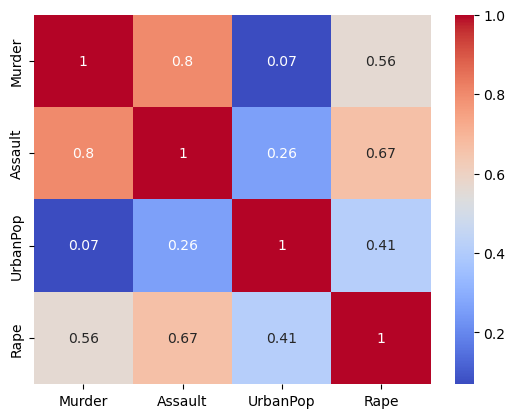

In [13]:
# Heatmaps help in identifying relatioships or correlations between certain types of data.
corr = data[['Murder', 'Assault', 'UrbanPop', 'Rape']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Analysis**

Crime Patterns: Assault and murder rates appear to move closely together. If a city has a high rate of assaults, it's more likely to have a high rate of murders. This could suggest underlying socio-economic factors or other shared causes influencing both crime rates simultaneously.

Urban Influence: Urban population percentage (UrbanPop) has a moderate relationship with rape rates. This could hint towards socio-cultural or security factors in urban areas that might be influencing rape rates. However, it's essential to remember correlation doesn't imply causation. There could be underlying factors not present in the dataset that influence these rates.

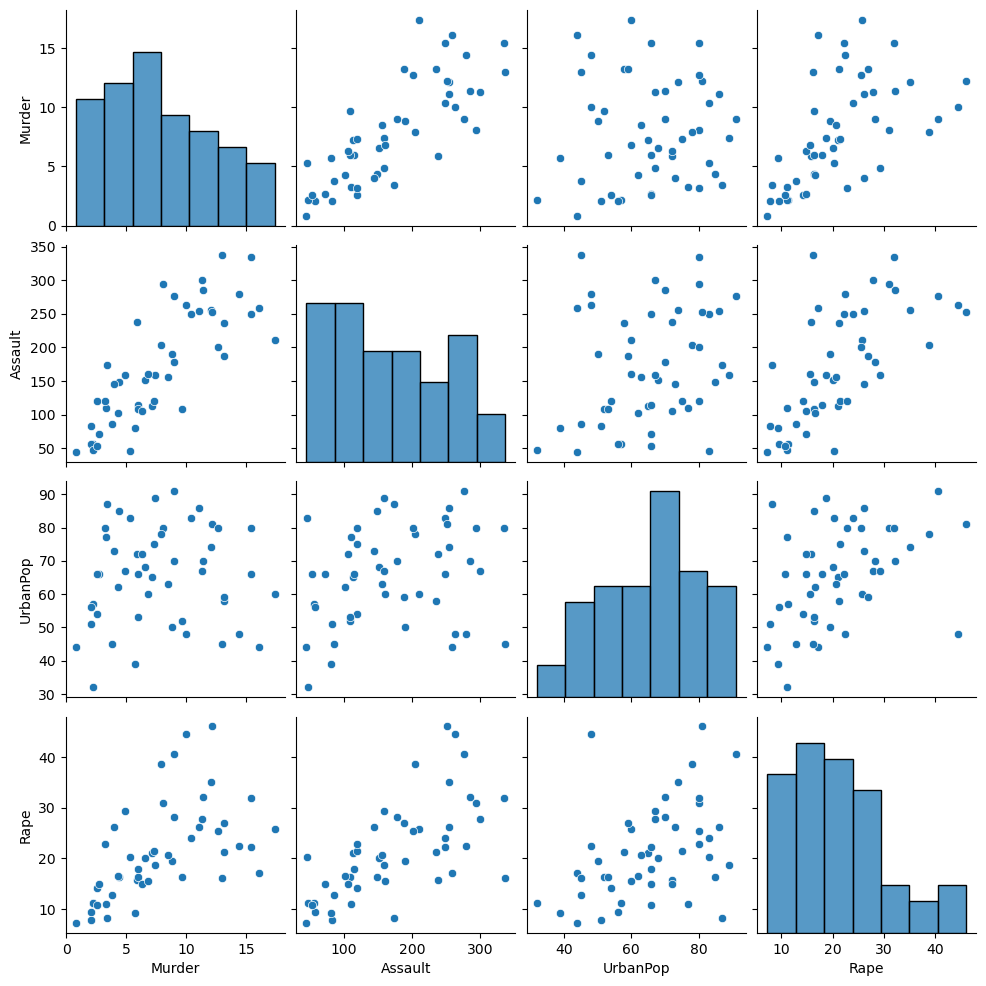

In [10]:
# pairplot shows similar results to the heatmap. It is just a different way to view the data
sns.pairplot(data[['Murder', 'Assault', 'UrbanPop', 'Rape']])

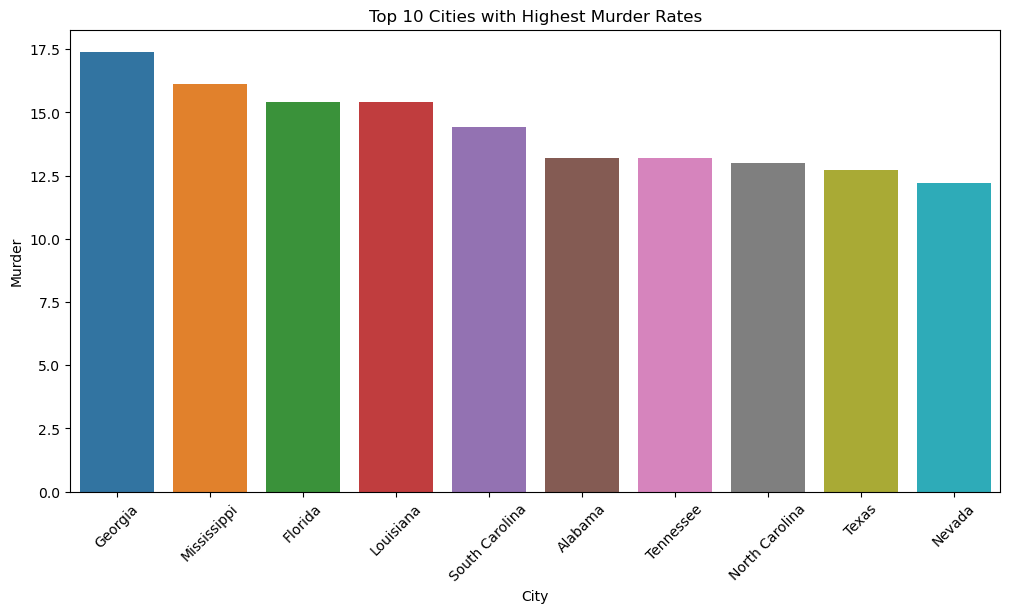

In [11]:
top_cities = data.sort_values(by='Murder', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Murder', data=top_cities)
plt.title('Top 10 Cities with Highest Murder Rates')
plt.xticks(rotation=45)
plt.show()


As the graph above tells us, Georgia is the state with the highest murder rate, followed by Mississippi and then Florida and Louisiana. Something interesting to note is that all of these states are in the south of America. This might imply that more imoverished states (like those in the south) contribute to higher crime and murder rates.

In [14]:
# Tabular dataframe

# creating a missing values dataframe
missing_values = data[['Murder', 'Assault', 'UrbanPop', 'Rape']].isnull().sum()
relevant_missing = pd.DataFrame(missing_values, columns=['missing'])

# creating a selected stats dataframe
selected_stats = data[['Murder', 'Assault', 'UrbanPop', 'Rape']].describe().transpose()[['count', 'mean', '50%', 'min', 'max', 'std']]
selected_stats.rename(columns={'50%': 'median'}, inplace=True)

# Concatenate side by side
summary = pd.concat([relevant_missing, selected_stats], axis=1)

# save to CSV and display
summary.to_csv('summary.csv', index=True) 
summary


,missing,count,mean,median,min,max,std
Murder,0,50.0,7.788,7.25,0.8,17.4,4.355510
Assault,0,50.0,170.760,159.00,45.0,337.0,83.337661
UrbanPop,0,50.0,65.540,66.00,32.0,91.0,14.474763
Rape,0,50.0,21.232,20.10,7.3,46.0,9.366385


General Observations:

-There's a significant range in crime rates across the cities, especially in the Assault category. The difference between the minimum and maximum values is substantial.

-No data is missing, which means that for this set of cities, we have a complete record for all the variables.

-Given the close proximity of mean and median values for most variables (especially UrbanPop), it suggests that the distributions might not be heavily skewed.

# PCA

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# exclude the city column as it's categorical
data_numeric = data.drop(columns=["City"])


In [24]:
# standardizing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

In [25]:
# initializing PCA and the number of components to retain
pca = PCA()

# fitting PCA on the standardized data
principal_components = pca.fit_transform(scaled_data)

In [26]:
# variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component: {explained_variance}")

cumulative_variance = explained_variance.cumsum()
print(f"Cumulative Explained Variance: {cumulative_variance}")

Explained Variance by Component: [0.62006039 0.24744129 0.0891408  0.04335752]
Cumulative Explained Variance: [0.62006039 0.86750168 0.95664248 1.        ]


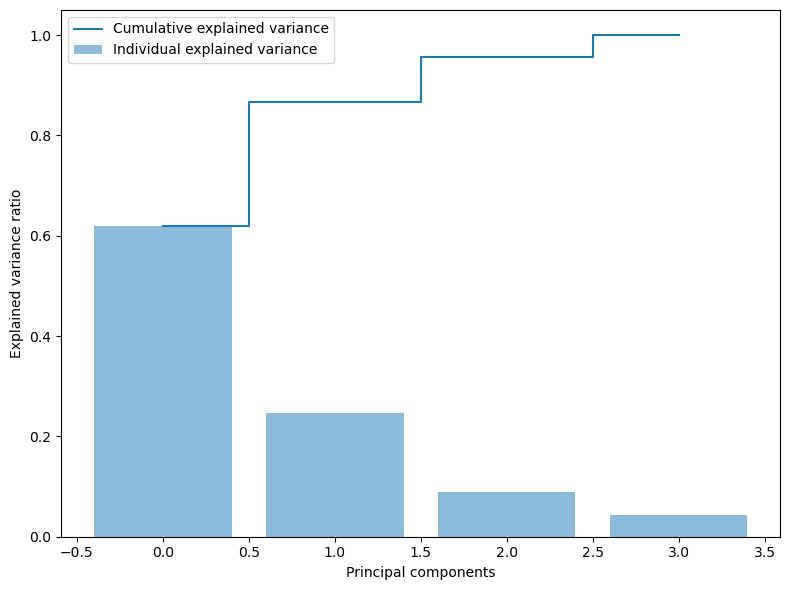

In [27]:
# plotting variance
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(cumulative_variance)), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Each bar represents the proportion of total variance explained by a particular principal component. The step line (cumulative line) shows the total variance explained by the first n components.

The first component alone captures a significant portion (60%) of the variance, indicating its dominance in representing the patterns in the dataset. By just considering the first two components, we can account for 85% of the total variance. 

Including the third component takes this to 95%, providing even more detailed information.

The fourth component only adds an additional 2% to the explained variance, which will in its exclusion as well as the third component.

In [28]:
# results
pca_df = pd.DataFrame(data=principal_components, columns=[f"Principal Component {i+1}" for i in range(len(explained_variance))])
print(pca_df.head())  # displaying the first few rows


   Principal Component 1  Principal Component 2  Principal Component 3  \
0               0.985566               1.133392              -0.444269   
1               1.950138               1.073213               2.040003   
2               1.763164              -0.745957               0.054781   
3              -0.141420               1.119797               0.114574   
4               2.523980              -1.542934               0.598557   

   Principal Component 4  
0               0.156267  
1              -0.438583  
2              -0.834653  
3              -0.182811  
4              -0.341996  


In [32]:
# feature names
labels = ["Murder", "Assault", "UrbanPop", "Rape"]

In [33]:
# feature importance for principal components
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pc1 = abs(pca.components_[0])  # Components x features
pc2 = abs(pca.components_[1])

In [34]:
# creating dataframe to show importance
feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2

print(feat_df)


   Features  PC1 Importance  PC2 Importance
0    Murder           0.536           0.418
1   Assault           0.583           0.188
2  UrbanPop           0.278           0.873
3      Rape           0.543           0.167


**For PC1:**

The features with the highest influence on this component are Assault (0.583) and Rape (0.543), closely followed by Murder (0.536). This suggests that these three variables have a strong correlation and can provide substantial information in describing the variance in this component.

UrbanPop (0.278) has a much lower importance in the context of PC1. This means that urban population rates have less of an influence on this principal component compared to the crime rates.

**For PC2:**

UrbanPop (0.873) is the most influential feature. This component likely captures the variance associated with urbanization or city population size. In contexts where PC2 has a significant role, the urban population might be a driving factor.

Murder (0.418) is the second-most influential feature in PC2, but it's significantly less impactful compared to UrbanPop.

Both Assault (0.188) and Rape (0.167) have comparatively lower influence on this component.

**Conclusion:**

PC1 is more related to crime rates (Murder, Assault, and Rape). This component could be thought of as capturing general crime tendencies in different cities or regions.

PC2, on the other hand, is dominantly influenced by UrbanPop. This component might be capturing the aspects related to urbanization, suggesting that certain patterns or behaviors become more apparent as urban population percentages change.

# Hierarchical clustering

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# excluding non-numeric column
numeric_data = df.drop(['City'], axis=1)

In [43]:
# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)  # Use numeric_data here

In [44]:
# computing the linkage matrix
Z = linkage(scaled_data, method='ward')

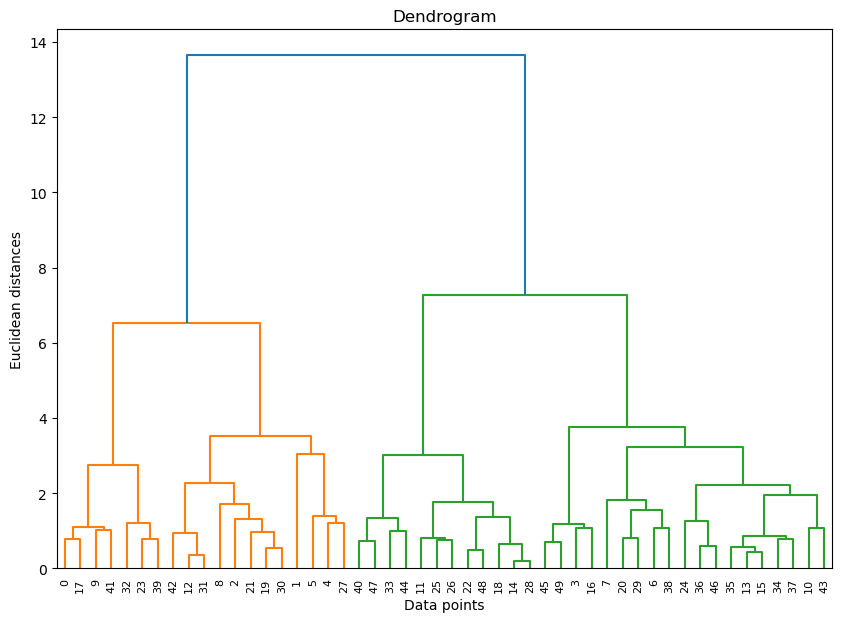

In [47]:
# plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.xlabel("Data points")
plt.show()

k= 3

In [46]:
# 4. Cut the Dendrogram to get clusters
clusters = fcluster(Z, t=3, criterion='maxclust')

# Append clusters to original data
df['Cluster'] = clusters

Insights:

Urbanization and Crime: While urbanization (UrbanPop) plays a role in crime rates, it is not a sole determinant. Cluster 3, despite having the highest urbanization rate, has moderate crime, suggesting other socioeconomic, policy, or cultural factors could be influencing crime rates.

**commonalities:**

Cluster 1 (High Crime Rate):

High Violent Crime Rates: All states in this cluster have a considerably high rate of violent crimes (Murder, Assault, Rape). 
More Urbanized: The average urban population percentage (UrbanPop) is around 68.316%, which suggests these states are relatively more urbanized.

Cluster 2 (Low Crime Rate):

Low Violent Crime Rates: All states in this cluster have low violent crime rates. The maximum murder rate in this cluster is less than the average murder rate of Cluster 1.
Less Urbanized: The average urban population percentage (UrbanPop) is around 52.083%. These states are less urbanized compared to the ones in the other clusters.

Cluster 3 (Moderate Crime Rate):

Moderate Crime Rates: These states have crime rates that fall between the high rates of Cluster 1 and the low rates of Cluster 2.
High Urbanization, Moderate Crime: This cluster has the highest average urban population, yet its crime rates are only moderate. This challenges the assumption that higher urbanization necessarily leads to higher crime rates.


Further insights:
Mnay initially assume that increased urbanization might correlate with higher crime rates. However, the data challenges this notion. Cluster 3, which has the highest average urbanization, only has moderate crime rates, suggesting other factors at play.

# K-means clustering

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# excluding non-numeric column
numeric_data = df.drop(['City'], axis=1)

In [50]:
# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

C:\Users\ramee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ramee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ramee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ramee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

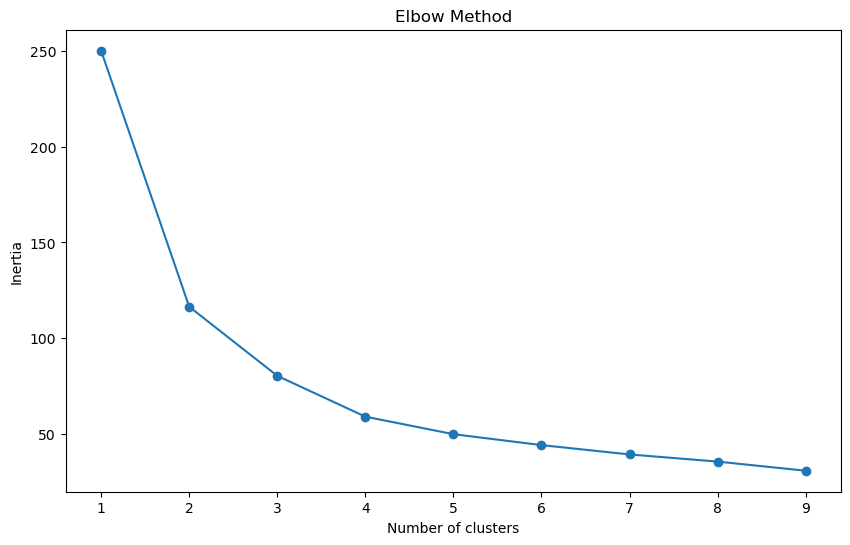

In [51]:
inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [52]:
k = 3

# 3. Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 4. Append clusters to original data
df['Cluster'] = clusters

C:\Users\ramee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ramee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Insights:

Urban Population vs. Crime: It's interesting to note that cities with the highest and moderate crime rates (Cluster 2 and Cluster 3) have a relatively high urban population percentage. The cities with the lowest crime rates (Cluster 1) tend to have lower urban population percentages. This implies some correlation between urbanization and crime rates.

Cluster Characteristics:

Cluster 2: Can be labeled as "High Crime Cities" due to distinctly higher crime rates across all categories.
Cluster 3: Can be termed as "Moderately Crime-Prone Cities with High Urbanization".
Cluster 1: Best described as "Low Crime, Less Urbanized Cities".
Variability: cluster 1 has the most variability in terms of crime rates, whereas cluster 0 cities are quite similar with low crime rates.

Further insights and commonalities:

**Cluster 1 (High Crime Rate):**
- **High Violent Crime Rates:** All cities in this cluster experience significantly high rates of violent crimes, especially in categories like Murder, Assault, and Rape.
- **More Urbanized:** The cities in this cluster have an average urban population percentage (UrbanPop) of about 68.316%, indicating a relatively high degree of urbanization.

**Cluster 2 (Low Crime Rate):**
- **Low Violent Crime Rates:** Cities in this cluster predominantly report low rates of violent crimes. The highest murder rate in this cluster is even below the average murder rate of Cluster 1.
- **Less Urbanized:** These cities, on average, have a lesser degree of urbanization, with the UrbanPop average around 52%. This suggests they are comparatively less urban than cities in other clusters.

**Cluster 3 (Moderate Crime Rate):**
- **Moderate Crime Rates:** Cities within this cluster exhibit crime rates that are moderate, fitting between the extremes of Cluster 1 and Cluster 2.
- **High Urbanization, Moderate Crime:** Intriguingly, this cluster, with an average urban population percentage of 71%, has the highest degree of urbanization among all clusters. Yet, the crime rates remain only moderate, which counters the usual assumption of urbanization leading to heightened crime rates.

### Further Insights:
Most people think that increased urbanization might intrinsically lead to escalating crime rates. However, the insights derived from this clustering data challenge this stereotype. For instance, Cluster 3, characterized by the highest degree of urbanization, only reports moderate crime rates. This observation underscores the complexity of crime determinants, suggesting that factors beyond mere urbanization influence crime rates.

# Conclusion

Both the k-means cluster and hierarchical cluster suggest the same information when it comes to the misconception that higher urbanization leads to higher crime rates. They both disprove this notion with evidence that debunks this myth.